# Getting Started with Tensors in PyTorch

## Step 1: Imports


In [ ]:
import torch

## Step 2: Creating Tensors from Python Data Structures


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
import numpy as np

def plot_tensor_blocks(tensor_data, title="Tensor Visualization"):
    """
    Visualizes a tensor (0D to 3D) as blocks in 3D space using matplotlib.
    Args:
        tensor_data (torch.Tensor or list/number): The data to visualize.
        title (str): The title of the plot.
    """
    # Convert to numpy array if it's a PyTorch tensor or Python list/number
    if hasattr(tensor_data, 'cpu'): # Check if it's a PyTorch tensor
        tensor_np = tensor_data.cpu().numpy()
    else:
        tensor_np = np.array(tensor_data) # Convert Python list/number

    ndim = tensor_np.ndim

    if ndim > 3:
        print(f"Visualization for {ndim}D tensor is not supported by this function.")
        print("Only 0D, 1D, 2D, or 3D tensors can be visualized as blocks.")
        return
    if ndim == 0 and tensor_np.size == 0 : # handles case of tensor([])
        print(f"Cannot visualize empty tensor: {tensor_data}")
        return


    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('auto') # 'equal' can cause issues if ranges are too different

    # Basic cube vertices for a 1x1x1 cube centered at (0.5,0.5,0.5) before translation
    # We will use bar3d for simplicity as in the original proposal

    # Set consistent viewing angle for better comparison
    ax.view_init(elev=20., azim=-65)

    # Remove axis tick labels for cleaner look, but keep axis names
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xlabel("Dim 2 (cols)") # X-axis often represents columns in a matrix
    ax.set_ylabel("Dim 1 (rows)") # Y-axis often represents rows
    ax.set_zlabel("Dim 0 (depth)")# Z-axis for depth in 3D

    colors = plt.cm.viridis(np.linspace(0, 1, 6)) # Get a few distinct colors

    if ndim == 0:  # Scalar
        ax.bar3d(0, 0, 0, 1, 1, 1, color=colors[0], edgecolor='k', shade=True)
        ax.set_title(f"{title}\nShape: ()", fontsize=10)
        # Set limits to center the single cube
        ax.set_xlim([-0.5, 1.5])
        ax.set_ylim([-0.5, 1.5])
        ax.set_zlim([-0.5, 1.5])

    elif ndim == 1:  # Vector
        size = tensor_np.shape[0]
        for i in range(size):
            ax.bar3d(i, 0, 0, 1, 1, 1, color=colors[1], edgecolor='k', shade=True)
        ax.set_title(f"{title}\nShape: {tensor_np.shape}", fontsize=10)
        ax.set_xlim([-0.5, size + 0.5])
        ax.set_ylim([-0.5, 1.5])
        ax.set_zlim([-0.5, 1.5])


    elif ndim == 2:  # Matrix
        rows, cols = tensor_np.shape
        for r in range(rows):
            for c in range(cols):
                # Plotting (col_idx, row_idx, 0)
                ax.bar3d(c, r, 0, 1, 1, 1, color=colors[2], edgecolor='k', shade=True)
        ax.set_title(f"{title}\nShape: {tensor_np.shape}", fontsize=10)
        ax.set_xlim([-0.5, cols + 0.5])
        ax.set_ylim([-0.5, rows + 0.5])
        ax.set_zlim([-0.5, 1.5])


    elif ndim == 3:  # 3D Tensor
        depth, rows, cols = tensor_np.shape
        for d in range(depth):
            for r in range(rows):
                for c in range(cols):
                    # Plotting (col_idx, row_idx, depth_idx)
                    ax.bar3d(c, r, d, 1, 1, 1, color=colors[d % len(colors)], edgecolor='k', shade=True)
        ax.set_title(f"{title}\nShape: {tensor_np.shape}", fontsize=10)
        ax.set_xlim([-0.5, cols + 0.5])
        ax.set_ylim([-0.5, rows + 0.5])
        ax.set_zlim([-0.5, depth + 0.5])

    plt.tight_layout()
    plt.show()

### 2.1 Scalar Tensor (0-dimensional)


Scalar Tensor:
tensor(7)
Value: 7 (use .item() to get Python number from a scalar tensor)
Shape: torch.Size([]) (empty, indicating a scalar)
Dimensions (ndim): 0 (0 dimensions)
Data type (dtype): torch.int64


<ipython-input-2-e65695fe66d2>:91: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


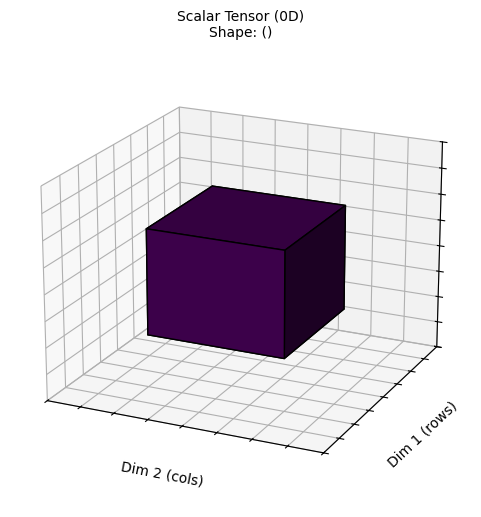

In [ ]:
# Making a tensor from a single number (a scalar)
scalar_tensor = torch.tensor(7)
print("Scalar Tensor:")
print(scalar_tensor)
print(f"Value: {scalar_tensor.item()} (use .item() to get Python number from a scalar tensor)")
print(f"Shape: {scalar_tensor.shape} (empty, indicating a scalar)")
print(f"Dimensions (ndim): {scalar_tensor.ndim} (0 dimensions)")
print(f"Data type (dtype): {scalar_tensor.dtype}")
plot_tensor_blocks(scalar_tensor, title="Scalar Tensor (0D)")


### 2.2 Vector Tensor (1-dimensional)



Vector Tensor:
tensor([1, 2, 3])
Shape: torch.Size([3]) (3 elements in the first dimension)
Dimensions (ndim): 1 (1 dimension)
Data type (dtype): torch.int64


<ipython-input-2-e65695fe66d2>:91: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


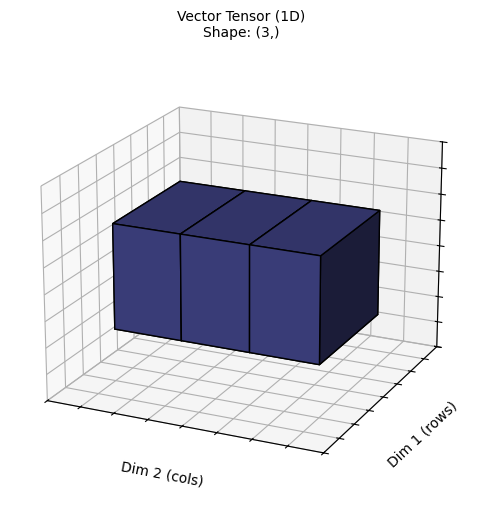

In [ ]:
# Making a tensor from a list (a vector)
vector_tensor = torch.tensor([1, 2, 3])
print("\nVector Tensor:")
print(vector_tensor)
print(f"Shape: {vector_tensor.shape} (3 elements in the first dimension)")
print(f"Dimensions (ndim): {vector_tensor.ndim} (1 dimension)")
print(f"Data type (dtype): {vector_tensor.dtype}")
plot_tensor_blocks(vector_tensor, title="Vector Tensor (1D)")


## Step 3: Creating Tensors with Specific Structures or Values


### 3.1 Tensors of Zeros


In [ ]:
zeros_tensor = torch.zeros(2, 3) # A 2x3 matrix of zeros
print("\nZeros Tensor (2x3):")
print(zeros_tensor)
print(f"Shape: {zeros_tensor.shape}")
print(f"Data type (dtype): {zeros_tensor.dtype}")


Zeros Tensor (2x3):
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape: torch.Size([2, 3])
Data type (dtype): torch.float32


### 3.2 Tensors of Ones


In [ ]:
ones_tensor_float = torch.ones(3, 2)
print("\nOnes Tensor (3x2, default float dtype):")
print(ones_tensor_float)
print(f"Shape: {ones_tensor_float.shape}")
print(f"Data type (dtype): {ones_tensor_float.dtype}")

ones_tensor_int = torch.ones(2, 2, dtype=torch.int32)
print("\nOnes Tensor (2x2, int32 dtype):")
print(ones_tensor_int)
print(f"Shape: {ones_tensor_int.shape}")
print(f"Data type (dtype): {ones_tensor_int.dtype}")


Ones Tensor (3x2, default float dtype):
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
Shape: torch.Size([3, 2])
Data type (dtype): torch.float32

Ones Tensor (2x2, int32 dtype):
tensor([[1, 1],
        [1, 1]], dtype=torch.int32)
Shape: torch.Size([2, 2])
Data type (dtype): torch.int32


### 3.3 Tensors of Random Numbers


In [ ]:
random_tensor_uniform = torch.rand(2, 3)
print("\nRandom Tensor (uniform distribution [0,1) shape 2x3):")
print(random_tensor_uniform)
print(f"Shape: {random_tensor_uniform.shape}")
print(f"Data type (dtype): {random_tensor_uniform.dtype}")

random_tensor_normal = torch.randn(2, 3)
print("\nRandom Tensor (standard normal distribution shape 2x3):")
print(random_tensor_normal)
print(f"Shape: {random_tensor_normal.shape}")
print(f"Data type (dtype): {random_tensor_normal.dtype}")


Random Tensor (uniform distribution [0,1) shape 2x3):
tensor([[0.6650, 0.3537, 0.5884],
        [0.0179, 0.5733, 0.8331]])
Shape: torch.Size([2, 3])
Data type (dtype): torch.float32

Random Tensor (standard normal distribution shape 2x3):
tensor([[-0.9579,  0.3293,  0.2686],
        [ 0.2994, -0.4681,  0.9269]])
Shape: torch.Size([2, 3])
Data type (dtype): torch.float32


## Step 4: A Note on Tensor Attributes


In [ ]:
matrix_tensor = torch.tensor([[1, 2], [3, 4]])

print("\nRecap on attributes for matrix_tensor:")
print(f"Content:\n{matrix_tensor}")
print(f"Shape: {matrix_tensor.shape}")
print(f"Number of dimensions (ndim): {matrix_tensor.ndim}")
print(f"Data type: {matrix_tensor.dtype}")

print(f"\nValue from scalar_tensor: {scalar_tensor.item()}")


Recap on attributes for matrix_tensor:
Content:
tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Number of dimensions (ndim): 2
Data type: torch.int64

Value from scalar_tensor: 7
